In [4]:
data_station_7005 <- read.csv("/home/jmaubian/SDD/Projet_stat_meteo/station_7005_obs.csv", header = TRUE, sep=",", dec=".")

head(data_station_7005)


,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Point.de.rosée,Humidité,⋯,Température...C.,Température.minimale.sur.12.heures...C.,Température.minimale.sur.24.heures...C.,Température.maximale.sur.12.heures...C.,Température.maximale.sur.24.heures...C.,Température.minimale.du.sol.sur.12.heures..en..C.,Latitude,Longitude,Altitude,mois_de_l_annee
,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7005,2017-11-24T13:00:00+01:00,101190,90,1,180,2.4,283.35,281.15,86,⋯,10.2,NA,NA,NA,NA,7.9,50.136,1.834,69,11
2,7005,2017-08-12T05:00:00+02:00,101670,-130,8,220,2.7,287.95,287.15,95,⋯,14.8,NA,NA,NA,NA,14.9,50.136,1.834,69,8
3,7005,2017-11-05T19:00:00+01:00,101800,220,1,280,1.5,279.65,276.75,82,⋯,6.5,5.8,NA,10.2,NA,7.7,50.136,1.834,69,11
4,7005,2017-04-17T23:00:00+02:00,102580,170,2,20,1.4,278.25,272.85,68,⋯,5.1,NA,NA,NA,NA,6.9,50.136,1.834,69,4
5,7005,2017-08-05T08:00:00+02:00,101480,80,3,240,2.4,288.65,286.65,88,⋯,15.5,14.4,NA,18.6,NA,15.7,50.136,1.834,69,8
6,7005,2017-11-18T22:00:00+01:00,101960,-90,6,300,7.5,283.55,282.75,95,⋯,10.4,NA,NA,NA,NA,6.4,50.136,1.834,69,11


In [5]:
# Load the CSV file into a data frame and choosing how many rows and columns

data <- read.csv("/home/jmaubian/SDD/Projet_stat_meteo/station_7005_obs.csv", header = TRUE, sep = ",")
print(dim(data))  # Print the dimensions of the data frame

# Check for missing values in the dataset per column and get a the missing values per column
missing_values <- colSums(is.na(data))
cat("Total missing values in the dataset per column:\n")
print(missing_values[missing_values > 0])

# Function to drop columns with more than a specified threshold of missing values
drop_columns_with_missing <- function(data, missing_values, threshold_ratio = 0.3) {
    threshold <- threshold_ratio * nrow(data)
    cols_to_drop <- names(missing_values[missing_values > threshold])
    data_cleaned <- data[, !(names(data) %in% cols_to_drop)]
    cat("Dropped columns with more than", threshold_ratio * 100, "% missing values:\n")
    print(cols_to_drop)
    # Save the cleaned data to a new CSV file
    write.csv(data_cleaned, "observations_cleaned_7005.csv", row.names = FALSE)
    return(data_cleaned)
}

# Example usage:
data_cleaned_7005 <- drop_columns_with_missing(data, missing_values)

[1] 176  66
Total missing values in the dataset per column:
                                            Temps.passé.1 
                                                      103 
                                            Temps.passé.2 
                                                      107 
                                        Nebulosité.totale 
                                                      108 
             Nébulosité..des.nuages.de.l..étage.inférieur 
                                                      108 
       Hauteur.de.la.base.des.nuages.de.l.étage.inférieur 
                                                      126 
                     Type.des.nuages.de.l.étage.inférieur 
                                                      108 
                         Type.des.nuages.de.l.étage.moyen 
                                                      126 
                     Type.des.nuages.de.l.étage.supérieur 
                                                      1

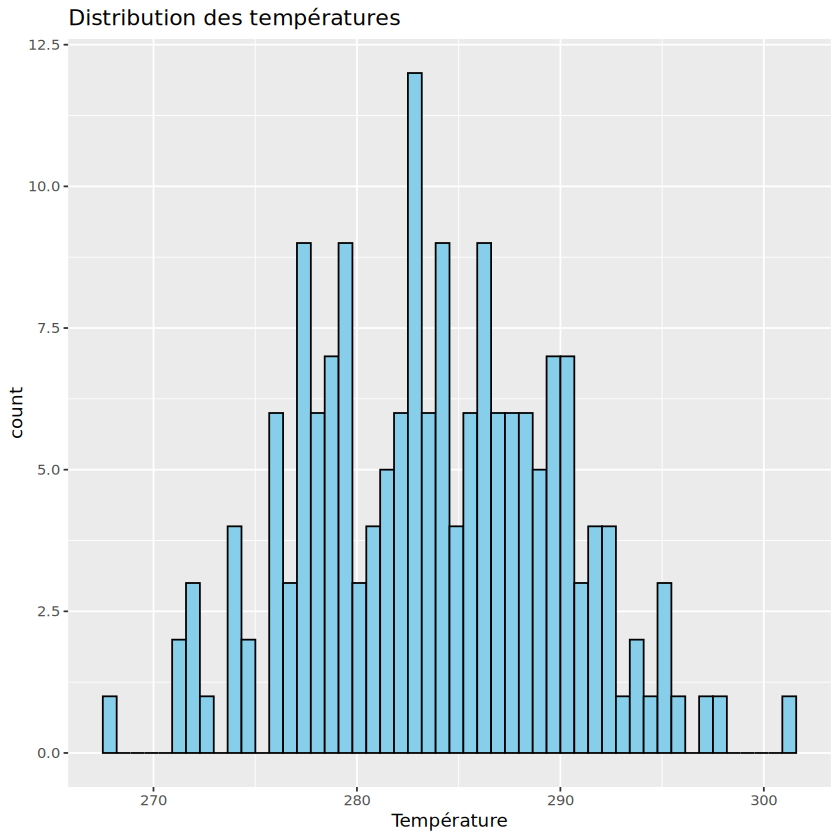

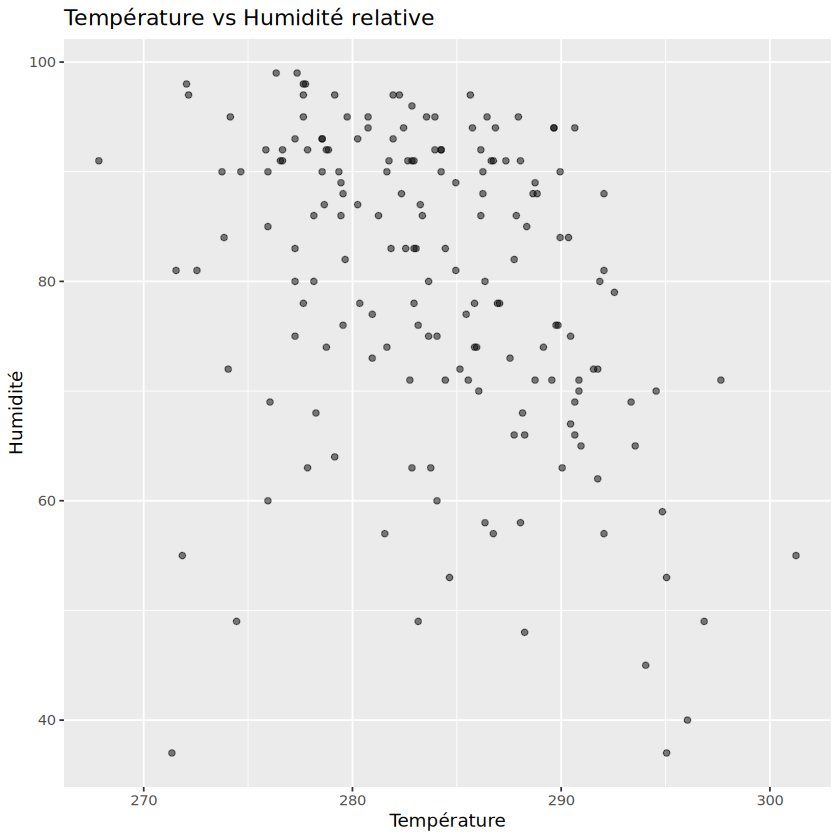

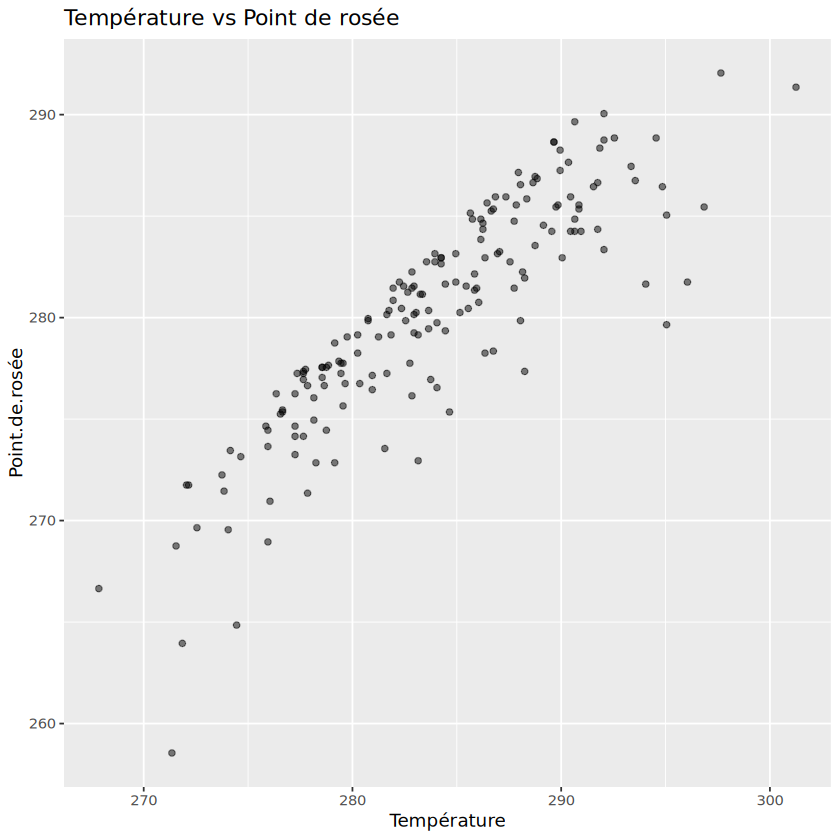

In [6]:
# 2. Présentation graphique
library(ggplot2)


# Histogramme de la température (K)
ggplot(data_cleaned_7005, aes(x=Température)) + geom_histogram(bins=50, fill="skyblue", color="black") +
ggtitle("Distribution des températures")


# Nuage de points Température vs Humidité
ggplot(data_cleaned_7005, aes(x=Température, y=Humidité)) + geom_point(alpha=0.5) +
ggtitle("Température vs Humidité relative")

# Nuage de points Température vs Point de rosée
ggplot(data_cleaned_7005, aes(x=Température, y=Point.de.rosée)) + geom_point(alpha=0.5) +
ggtitle("Température vs Point de rosée")

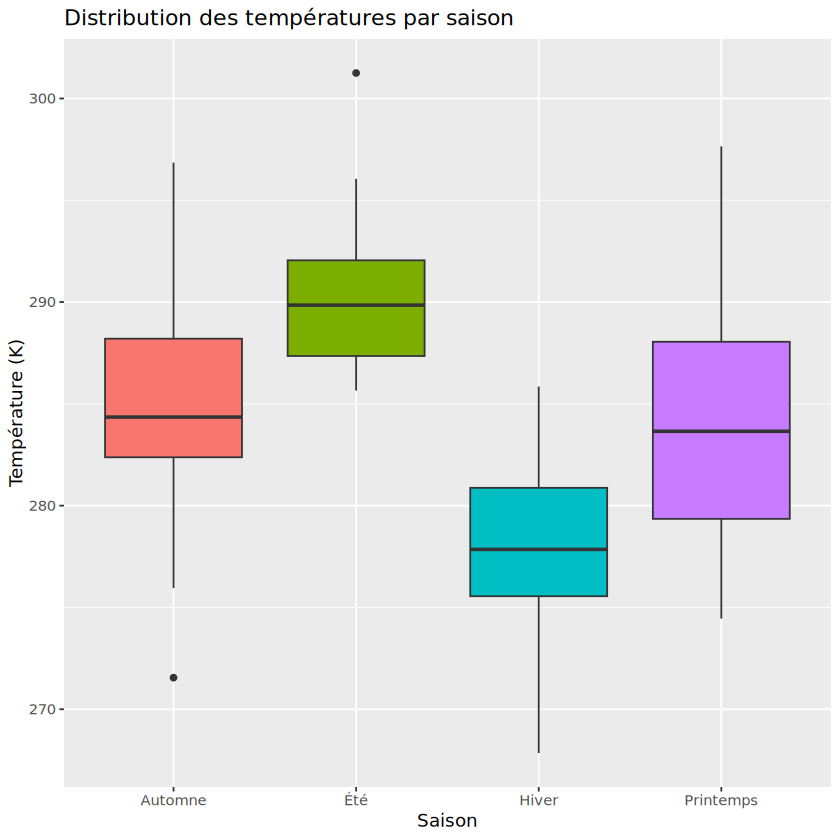

In [7]:
# Regrouper par mois ou saisons

#install.packages("lubridate")
library(lubridate)
data_cleaned_7005$Date <- as.POSIXct(data_cleaned_7005$Date, format="%Y-%m-%dT%H:%M:%S", tz="Europe/Berlin")
data_cleaned_7005$mois <- month(data_cleaned_7005$Date)
data_cleaned_7005$saison <- ifelse(data_cleaned_7005$mois %in% c(12, 1, 2), "Hiver",
                            ifelse(data_cleaned_7005$mois %in% c(3, 4, 5), "Printemps",
                                   ifelse(data_cleaned_7005$mois %in% c(6, 7, 8), "Été", "Automne")))

# Boxplot Température par saison
ggplot(data_cleaned_7005, aes(x=saison, y=Température, fill=saison)) + geom_boxplot() +
ggtitle("Distribution des températures par saison") +
xlab("Saison") + ylab("Température (K)") +
theme(legend.position="none")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# A tibble: 4 × 2
  saison    nb_obs
  <chr>      <int>
1 Automne       54
2 Hiver         44
3 Printemps     49
4 Été           29


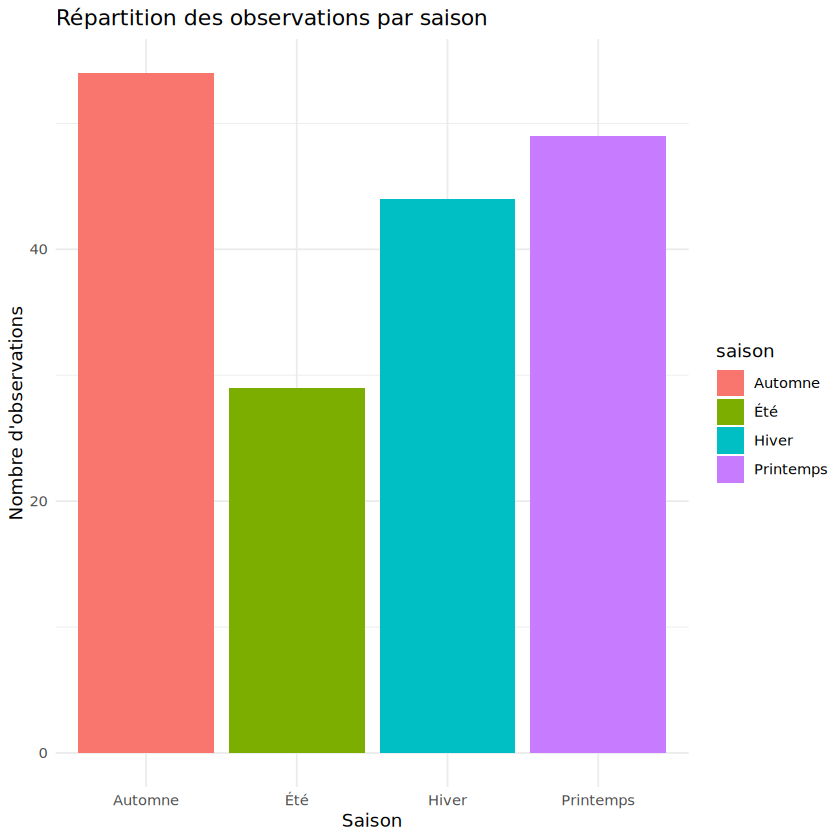

In [8]:
library(dplyr)

# Nombre d'observations par saison
saison_counts <- data_cleaned_7005 %>%
    group_by(saison) %>%
    summarize(nb_obs = n())
print(saison_counts)

ggplot(saison_counts, aes(x = saison, y = nb_obs, fill = saison)) +
  geom_col() +
  labs(title = "Répartition des observations par saison",
       x = "Saison", y = "Nombre d'observations") +
  theme_minimal()


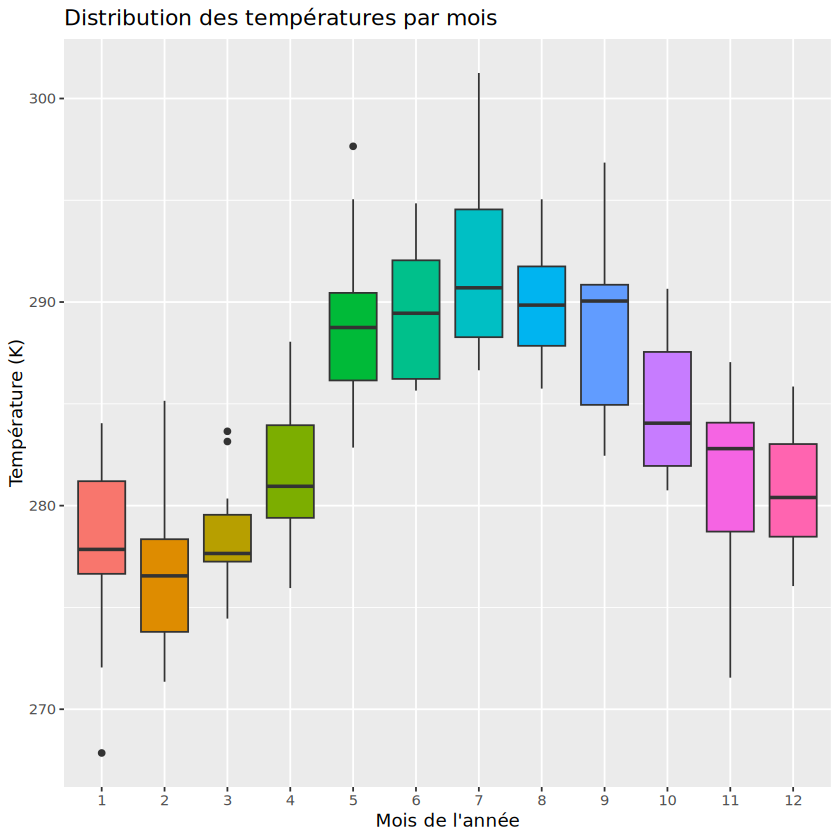

In [9]:
ggplot(data_cleaned_7005, aes(x = factor(mois), y = Température, fill = factor(mois))) +
  geom_boxplot() +
  ggtitle("Distribution des températures par mois") +
  xlab("Mois de l'année") + ylab("Température (K)") +
  theme(legend.position="none")


,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Point.de.rosée,Humidité,⋯,Précipitations.dans.les.12.dernières.heures,Précipitations.dans.les.24.dernières.heures,Température...C.,Température.minimale.du.sol.sur.12.heures..en..C.,Latitude,Longitude,Altitude,mois_de_l_annee,mois,saison
,<int>,<dttm>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>
1,7005,2017-11-24 13:00:00,101190,90,1,180,2.4,283.35,281.15,86,⋯,6.7,7.3,10.2,7.9,50.136,1.834,69,11,11,Automne
2,7005,2017-08-12 05:00:00,101670,-130,8,220,2.7,287.95,287.15,95,⋯,1.0,1.8,14.8,14.9,50.136,1.834,69,8,8,Été
3,7005,2017-11-05 19:00:00,101800,220,1,280,1.5,279.65,276.75,82,⋯,2.3,9.3,6.5,7.7,50.136,1.834,69,11,11,Automne
4,7005,2017-04-17 23:00:00,102580,170,2,20,1.4,278.25,272.85,68,⋯,0.0,0.4,5.1,6.9,50.136,1.834,69,4,4,Printemps
5,7005,2017-08-05 08:00:00,101480,80,3,240,2.4,288.65,286.65,88,⋯,0.0,2.4,15.5,15.7,50.136,1.834,69,8,8,Été
6,7005,2017-11-18 22:00:00,101960,-90,6,300,7.5,283.55,282.75,95,⋯,17.7,17.7,10.4,6.4,50.136,1.834,69,11,11,Automne


'data.frame':	176 obs. of  32 variables:
 $ ID.OMM.station                                           : int  7005 7005 7005 7005 7005 7005 7005 7005 7005 7005 ...
 $ Date                                                     : POSIXct, format: "2017-11-24 13:00:00" "2017-08-12 05:00:00" ...
 $ Pression.au.niveau.mer                                   : int  101190 101670 101800 102580 101480 101960 102850 102410 100340 101990 ...
 $ Variation.de.pression.en.3.heures                        : int  90 -130 220 170 80 -90 -160 20 330 -130 ...
 $ Type.de.tendance.barométrique                            : int  1 8 1 2 3 6 6 3 3 6 ...
 $ Direction.du.vent.moyen.10.mn                            : int  180 220 280 20 240 300 250 40 290 340 ...
 $ Vitesse.du.vent.moyen.10.mn                              : num  2.4 2.7 1.5 1.4 2.4 7.5 10.6 2.9 11.6 1.4 ...
 $ Température                                              : num  283 288 280 278 289 ...
 $ Point.de.rosée                                      

 ID.OMM.station      Date                     Pression.au.niveau.mer
 Min.   :7005   Min.   :2015-09-04 02:00:00   Min.   : 98930        
 1st Qu.:7005   1st Qu.:2016-05-07 18:30:00   1st Qu.:101295        
 Median :7005   Median :2016-12-03 22:00:00   Median :101805        
 Mean   :7005   Mean   :2016-12-25 10:56:15   Mean   :101740        
 3rd Qu.:7005   3rd Qu.:2017-08-12 10:15:00   3rd Qu.:102275        
 Max.   :7005   Max.   :2018-05-29 02:00:00   Max.   :103890        
                                                                    
 Variation.de.pression.en.3.heures Type.de.tendance.barométrique
 Min.   :-440.000                  Min.   :0.00                 
 1st Qu.: -72.500                  1st Qu.:3.00                 
 Median :  -5.000                  Median :5.00                 
 Mean   :  -9.091                  Mean   :4.46                 
 3rd Qu.:  60.000                  3rd Qu.:7.00                 
 Max.   : 330.000                  Max.   :8.00           

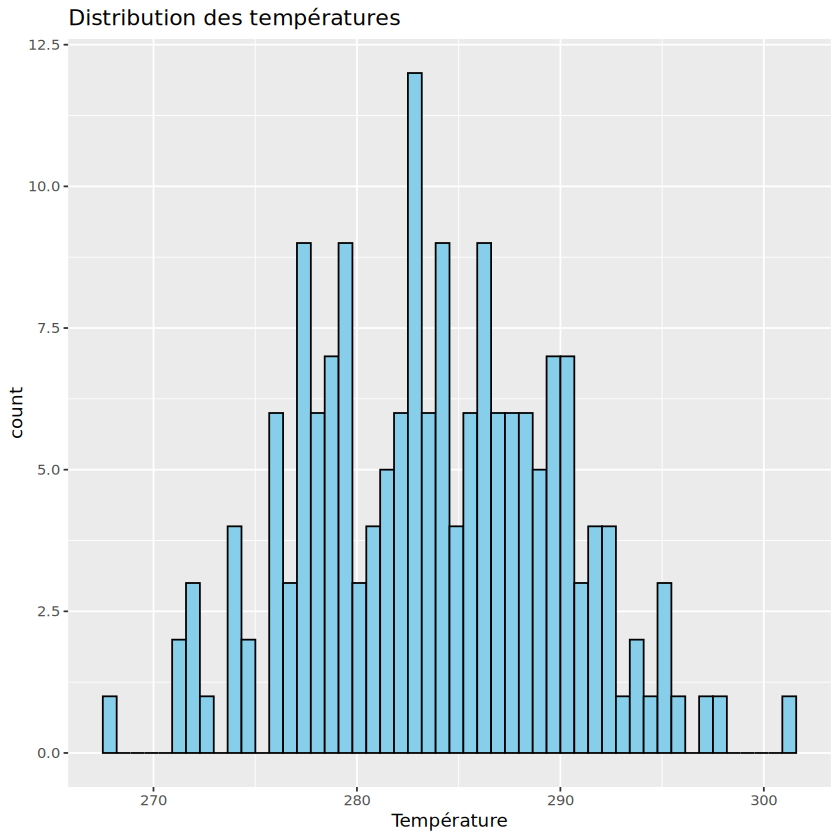

[1] 283.8159

[1] 37.3634

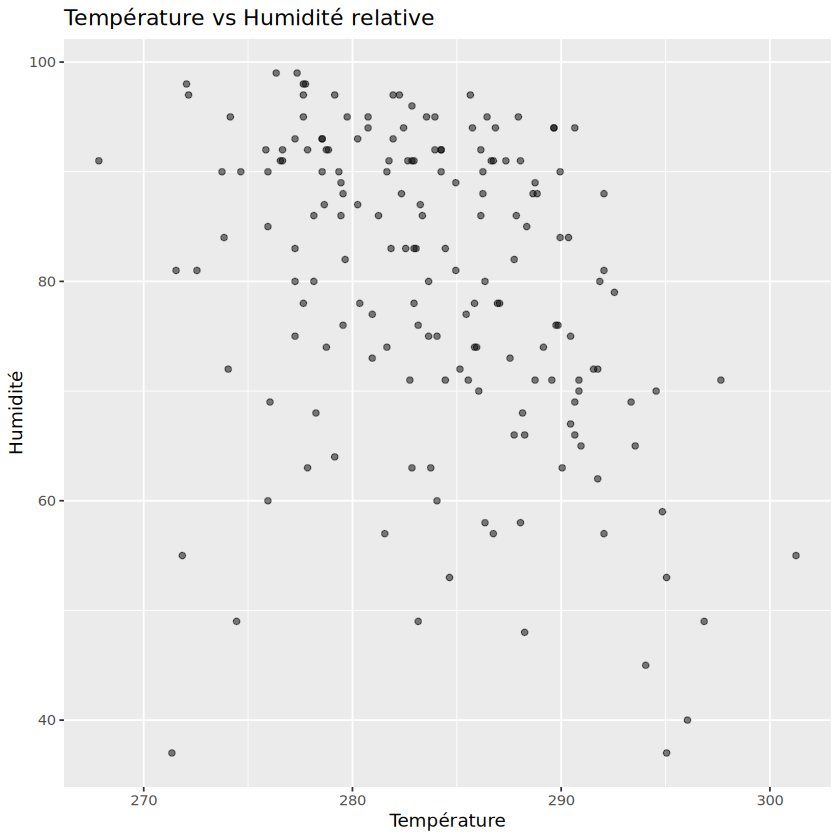

In [10]:
# --- Projet météo en R ---


# 1. Chargement des données depuis le fichier local
#data_meteo <- read.csv("meteo.csv", sep=";", header=TRUE, stringsAsFactors=FALSE)


# Aperçu des données
head(data_cleaned_7005)
str(data_cleaned_7005)
summary(data_cleaned_7005)


# 2. Présentation graphique
library(ggplot2)


# Histogramme de la température
ggplot(data_cleaned_7005, aes(x=Température)) + geom_histogram(bins=50, fill="skyblue", color="black") +
ggtitle("Distribution des températures")


# Nuage de points Température vs Humidité
ggplot(data_cleaned_7005, aes(x=Température, y=Humidité)) + geom_point(alpha=0.5) +
ggtitle("Température vs Humidité relative")


# 3. Estimateurs (moyenne et variance)
mean_temp <- mean(data_cleaned_7005$Température, na.rm=TRUE)
var_temp <- var(data_cleaned_7005$Température, na.rm=TRUE)
mean_temp
var_temp



In [11]:
cor.test(data_cleaned_7005$Température, data_cleaned_7005$Humidité, method = "pearson")
cor.test(data_cleaned_7005$Température, data_cleaned_7005$Humidité, method = "spearman")



	Pearson's product-moment correlation

data:  data_cleaned_7005$Température and data_cleaned_7005$Humidité
t = -5.1976, df = 174, p-value = 5.612e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4880512 -0.2312147
sample estimates:
       cor 
-0.3665967 


Warning message in cor.test.default(data_cleaned_7005$Température, data_cleaned_7005$Humidité, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  data_cleaned_7005$Température and data_cleaned_7005$Humidité
S = 1251608, p-value = 2.404e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.3775127 


-> Corrélation négative

In [12]:

# 4. Tests statistiques
# Test t sur la moyenne de température (H0: mu=15)
t_test <- t.test(data_cleaned_7005$Température-273.15, mu=15, na.rm=TRUE)
t_test




	One Sample t-test

data:  data_cleaned_7005$Température - 273.15
t = -9.4066, df = 175, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 15
95 percent confidence interval:
  9.756564 11.575254
sample estimates:
mean of x 
 10.66591 


In [13]:
# Comparaison humidité

data_cleaned_7005$humidite_cat <- ifelse(data_cleaned_7005$Humidité < 80, "Faible", "Élevée")
t.test(Température ~ humidite_cat, data = data_cleaned_7005)

#saisons

t.test(Température ~ saison, data = subset(data_cleaned_7005, saison %in% c("Été", "Hiver")))




	Welch Two Sample t-test

data:  Température by humidite_cat
t = -4.9021, df = 140.06, p-value = 2.588e-06
alternative hypothesis: true difference in means between group Élevée and group Faible is not equal to 0
95 percent confidence interval:
 -6.183747 -2.629349
sample estimates:
mean in group Élevée mean in group Faible 
            281.9381             286.3447 



	Welch Two Sample t-test

data:  Température by saison
t = 13.222, df = 64.893, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Été and group Hiver is not equal to 0
95 percent confidence interval:
 10.41884 14.12646
sample estimates:
  mean in group Été mean in group Hiver 
           290.2431            277.9705 


In [14]:
# Température loi normale ?

shapiro.test(data_cleaned_7005$Température)



	Shapiro-Wilk normality test

data:  data_cleaned_7005$Température
W = 0.99533, p-value = 0.8598


-> pas d'écart significatif à la loi normale


In [15]:

# ANOVA : comparer températures selon le mois
library(lubridate)
data_cleaned_7005$Date <- as.Date(data_cleaned_7005$Date)
data_cleaned_7005$mois <- month(data_cleaned_7005$Date)
anova_model <- aov(Température ~ factor(mois), data=data_cleaned_7005)
summary(anova_model)




              Df Sum Sq Mean Sq F value Pr(>F)    
factor(mois)  11   4312   392.0   28.88 <2e-16 ***
Residuals    164   2226    13.6                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [20]:
tukey_result <- TukeyHSD(anova_model)
tukey_result


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Température ~ factor(mois), data = data_cleaned_7005)

$`factor(mois)`
              diff         lwr         upr     p adj
2-1    -1.83719298  -6.0570075  2.38262155 0.9528496
3-1     0.45025641  -4.1792858  5.07979858 1.0000000
4-1     3.35333333  -1.1078051  7.81447180 0.3521865
5-1    10.52571429   6.3955026 14.65592594 0.0000000
6-1    11.43583333   6.0871162 16.78455045 0.0000000
7-1    13.69833333   8.3496162 19.04705045 0.0000000
8-1    11.45025641   6.8207142 16.07979858 0.0000000
9-1    10.63803922   6.3100992 14.96597924 0.0000000
10-1    6.60666667   2.4764550 10.73687832 0.0000230
11-1    3.42958333  -0.9612966  7.82046326 0.2941240
12-1    2.58333333  -2.4043711  7.57103776 0.8577219
3-2     2.28744939  -2.1100202  6.68491901 0.8542021
4-2     5.19052632   0.9707118  9.41034084 0.0039461
5-2    12.36290727   8.4946096 16.23120490 0.0000000
6-2    13.27302632   8.1238659 18.42218

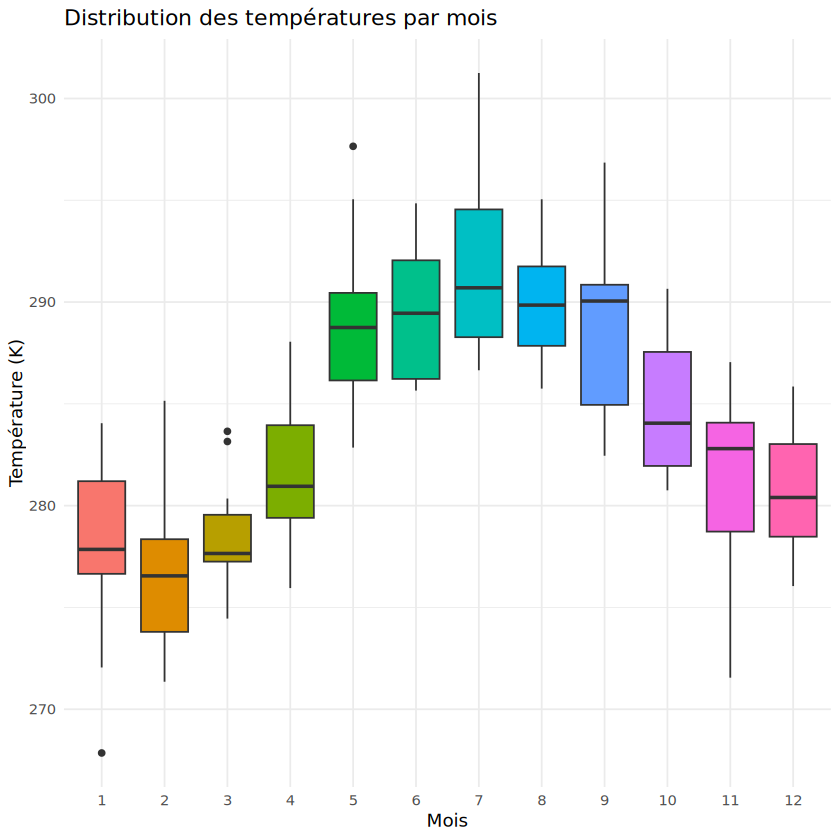

In [24]:
library(ggplot2)

ggplot(data_cleaned_7005, aes(x = factor(mois), y = Température, fill = factor(mois))) +
  geom_boxplot() +
  ggtitle("Distribution des températures par mois") +
  xlab("Mois") +
  ylab("Température (K)") +
  theme_minimal() +
  theme(legend.position = "none")


L’ANOVA (Analysis of Variance) est utilisée pour comparer les moyennes de plusieurs groupes.

Dans ce cas :

Variable continue : Température

Variable catégorielle : mois (12 niveaux : janvier → décembre)

Question que l’on se pose : Les températures moyennes diffèrent-elles significativement selon le mois de l’année ?



In [16]:
# 5. Régression linéaire
reg_model <- lm(Température ~ Pression.au.niveau.mer + Humidité, data=data_cleaned_7005)
summary(reg_model)





Call:
lm(formula = Température ~ Pression.au.niveau.mer + Humidité, 
    data = data_cleaned_7005)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.5042  -3.6042   0.3118   4.5499  13.3617 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.429e+02  4.930e+01   6.954 6.97e-11 ***
Pression.au.niveau.mer -4.558e-04  4.847e-04  -0.940    0.348    
Humidité               -1.587e-01  3.073e-02  -5.165 6.57e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.705 on 173 degrees of freedom
Multiple R-squared:  0.1388,	Adjusted R-squared:  0.1288 
F-statistic: 13.94 on 2 and 173 DF,  p-value: 2.436e-06


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>.”


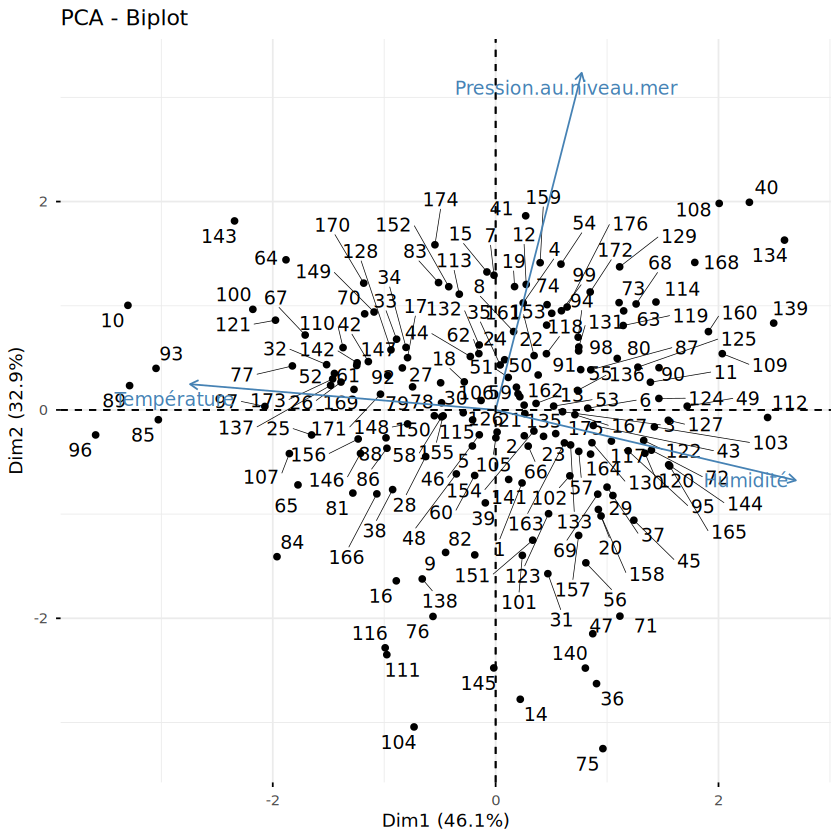

In [17]:
# 6. ACP
library(FactoMineR)
library(factoextra)
acp_data <- data_cleaned_7005[,c("Température","Pression.au.niveau.mer","Humidité")]
acp_data <- na.omit(acp_data)
res.pca <- PCA(acp_data, graph=FALSE)
fviz_pca_biplot(res.pca, repel=TRUE)



In [18]:

# 7. PLS
library(pls)
pls_model <- plsr(Température ~ Pression.au.niveau.mer + Humidité, data=data_cleaned_7005, validation="CV")
summary(pls_model)




Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




Data: 	X dimension: 176 2 
	Y dimension: 176 1
Fit method: kernelpls
Number of components considered: 2

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps
CV            6.13    6.123    5.778
adjCV         6.13    6.120    5.772

TRAINING: % variance explained
             1 comps  2 comps
X            99.9750   100.00
Température   0.6078    13.88


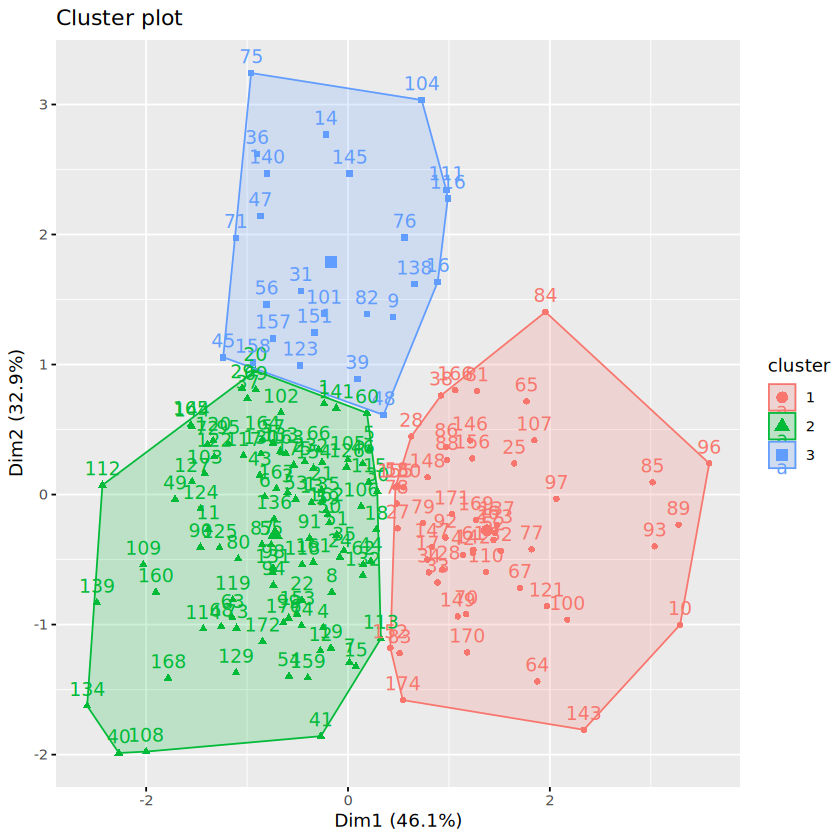

In [19]:

# 8. Clustering (KMeans)
kmeans_data <- scale(acp_data)
kmeans_model <- kmeans(kmeans_data, centers=3, nstart=25)
fviz_cluster(kmeans_model, data=kmeans_data)

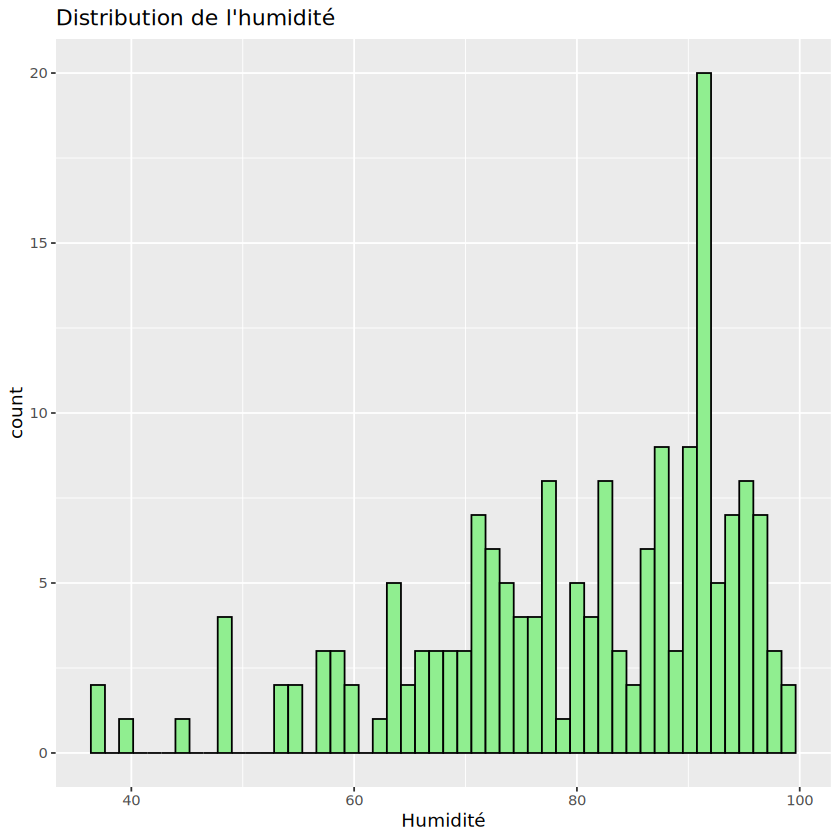

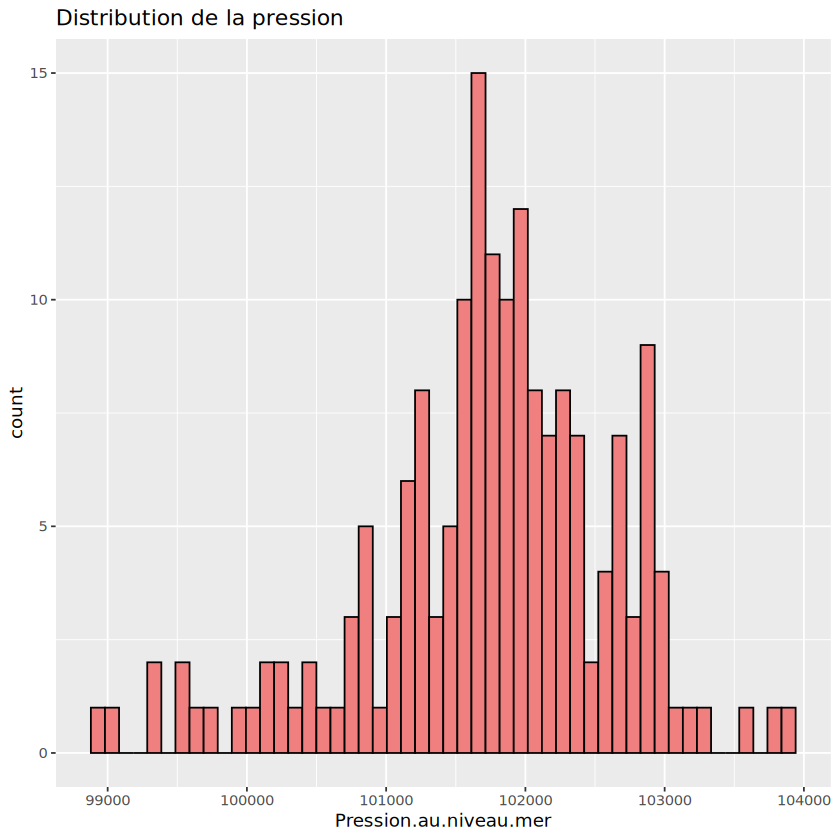

In [25]:
ggplot(data_cleaned_7005, aes(x=Humidité)) +
  geom_histogram(bins=50, fill="lightgreen", color="black") +
  ggtitle("Distribution de l'humidité")

ggplot(data_cleaned_7005, aes(x=Pression.au.niveau.mer)) +
  geom_histogram(bins=50, fill="lightcoral", color="black") +
  ggtitle("Distribution de la pression")